### Importações

In [1]:
import pandas as pd
import numpy as np
import sys
import os

In [2]:
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
from Functions.FNC_Pro import lista_produtos, configurar_credenciais_bq, Base_venda

### Base de vendas

In [3]:
produtos = lista_produtos('G:/Drives compartilhados/Planilha de Impostos/BI/Planilha com Impostos.xlsm')
produtos.head()

,ID_Sku
0,74001
1,61580
2,10530
3,18615
4,67857


In [3]:
configurar_credenciais_bq(r'G:Drives compartilhados/Bases BI/epoca-230913-b478a9a0dd4c.json')

Venda = Base_venda('7172')

c:\Users\joao.pcarvalho\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


SKU 7172: Histórico de dados ajustado para começar em 2022-09-29, o primeiro dia com vendas.


In [4]:
Venda.tail()

,SKU,Preco_Listado,Preco,Demanda,Log_Preco,Log_Demanda,Log_Demanda_7D,Ano_Mes,Black_Friday,Domingo,Quarta-feira,Quinta-feira,Segunda-feira,Sexta-feira,Sábado,Terça-feira,Log_Preco_7D,promocionado_25,promocionado_50
Data,,,,,,,,,,,,,,,,,,,
2025-09-25,7172,365.74,365.74,17.0,5.901923,2.833213,2.790288,2025-09,0,0,0,1,0,0,0,0,5.898374,0,0
2025-09-26,7172,358.78,358.78,13.0,5.882709,2.564949,2.841582,2025-09,0,0,0,0,0,1,0,0,5.892161,0,0
2025-09-27,7172,360.80,360.80,18.0,5.888324,2.890372,2.929287,2025-09,0,0,0,0,0,0,1,0,5.888177,0,0
2025-09-28,7172,360.21,360.21,21.0,5.886687,3.044522,2.944439,2025-09,0,1,0,0,0,0,0,0,5.884678,0,0
2025-09-29,7172,369.00,369.00,2.0,5.910797,0.693147,2.754570,2025-09,0,0,0,0,1,0,0,0,5.900277,0,0


### Avaliação estatística

=== AVALIAÇÃO ESTATÍSTICA PARA SKU 7172 ===

1. ESTATÍSTICAS DESCRITIVAS:
           Preco    Demanda  Log_Preco  Log_Demanda  Log_Preco_7D  \
count  1097.0000  1097.0000  1097.0000    1097.0000     1097.0000   
mean    298.2846    58.9034     5.6922       3.6924        5.6920   
std      32.4190   128.9947     0.1083       0.8148        0.1011   
min     185.3600     0.0000     5.2223      -4.6052        5.3645   
25%     275.8600    24.0000     5.6199       3.1781        5.6230   
50%     293.7400    41.0000     5.6827       3.7136        5.6804   
75%     319.3000    68.0000     5.7661       4.2195        5.7601   
max     381.0100  3191.0000     5.9428       8.0681        5.9173   

       Log_Demanda_7D  
count       1097.0000  
mean           3.7926  
std            0.6827  
min            2.0053  
25%            3.3011  
50%            3.8067  
75%            4.2382  
max            6.9123  


2. VALORES MISSING:
SKU                0
Preco_Listado      0
Preco              0
Dem

c:\Users\joao.pcarvalho\Desktop\Git Repositórios\Forecast-vendas-e-elasticidade\Functions\FNC_aval_estat.py:151: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_prices.index, y=top_prices.values, palette='viridis', order=top_prices.index)


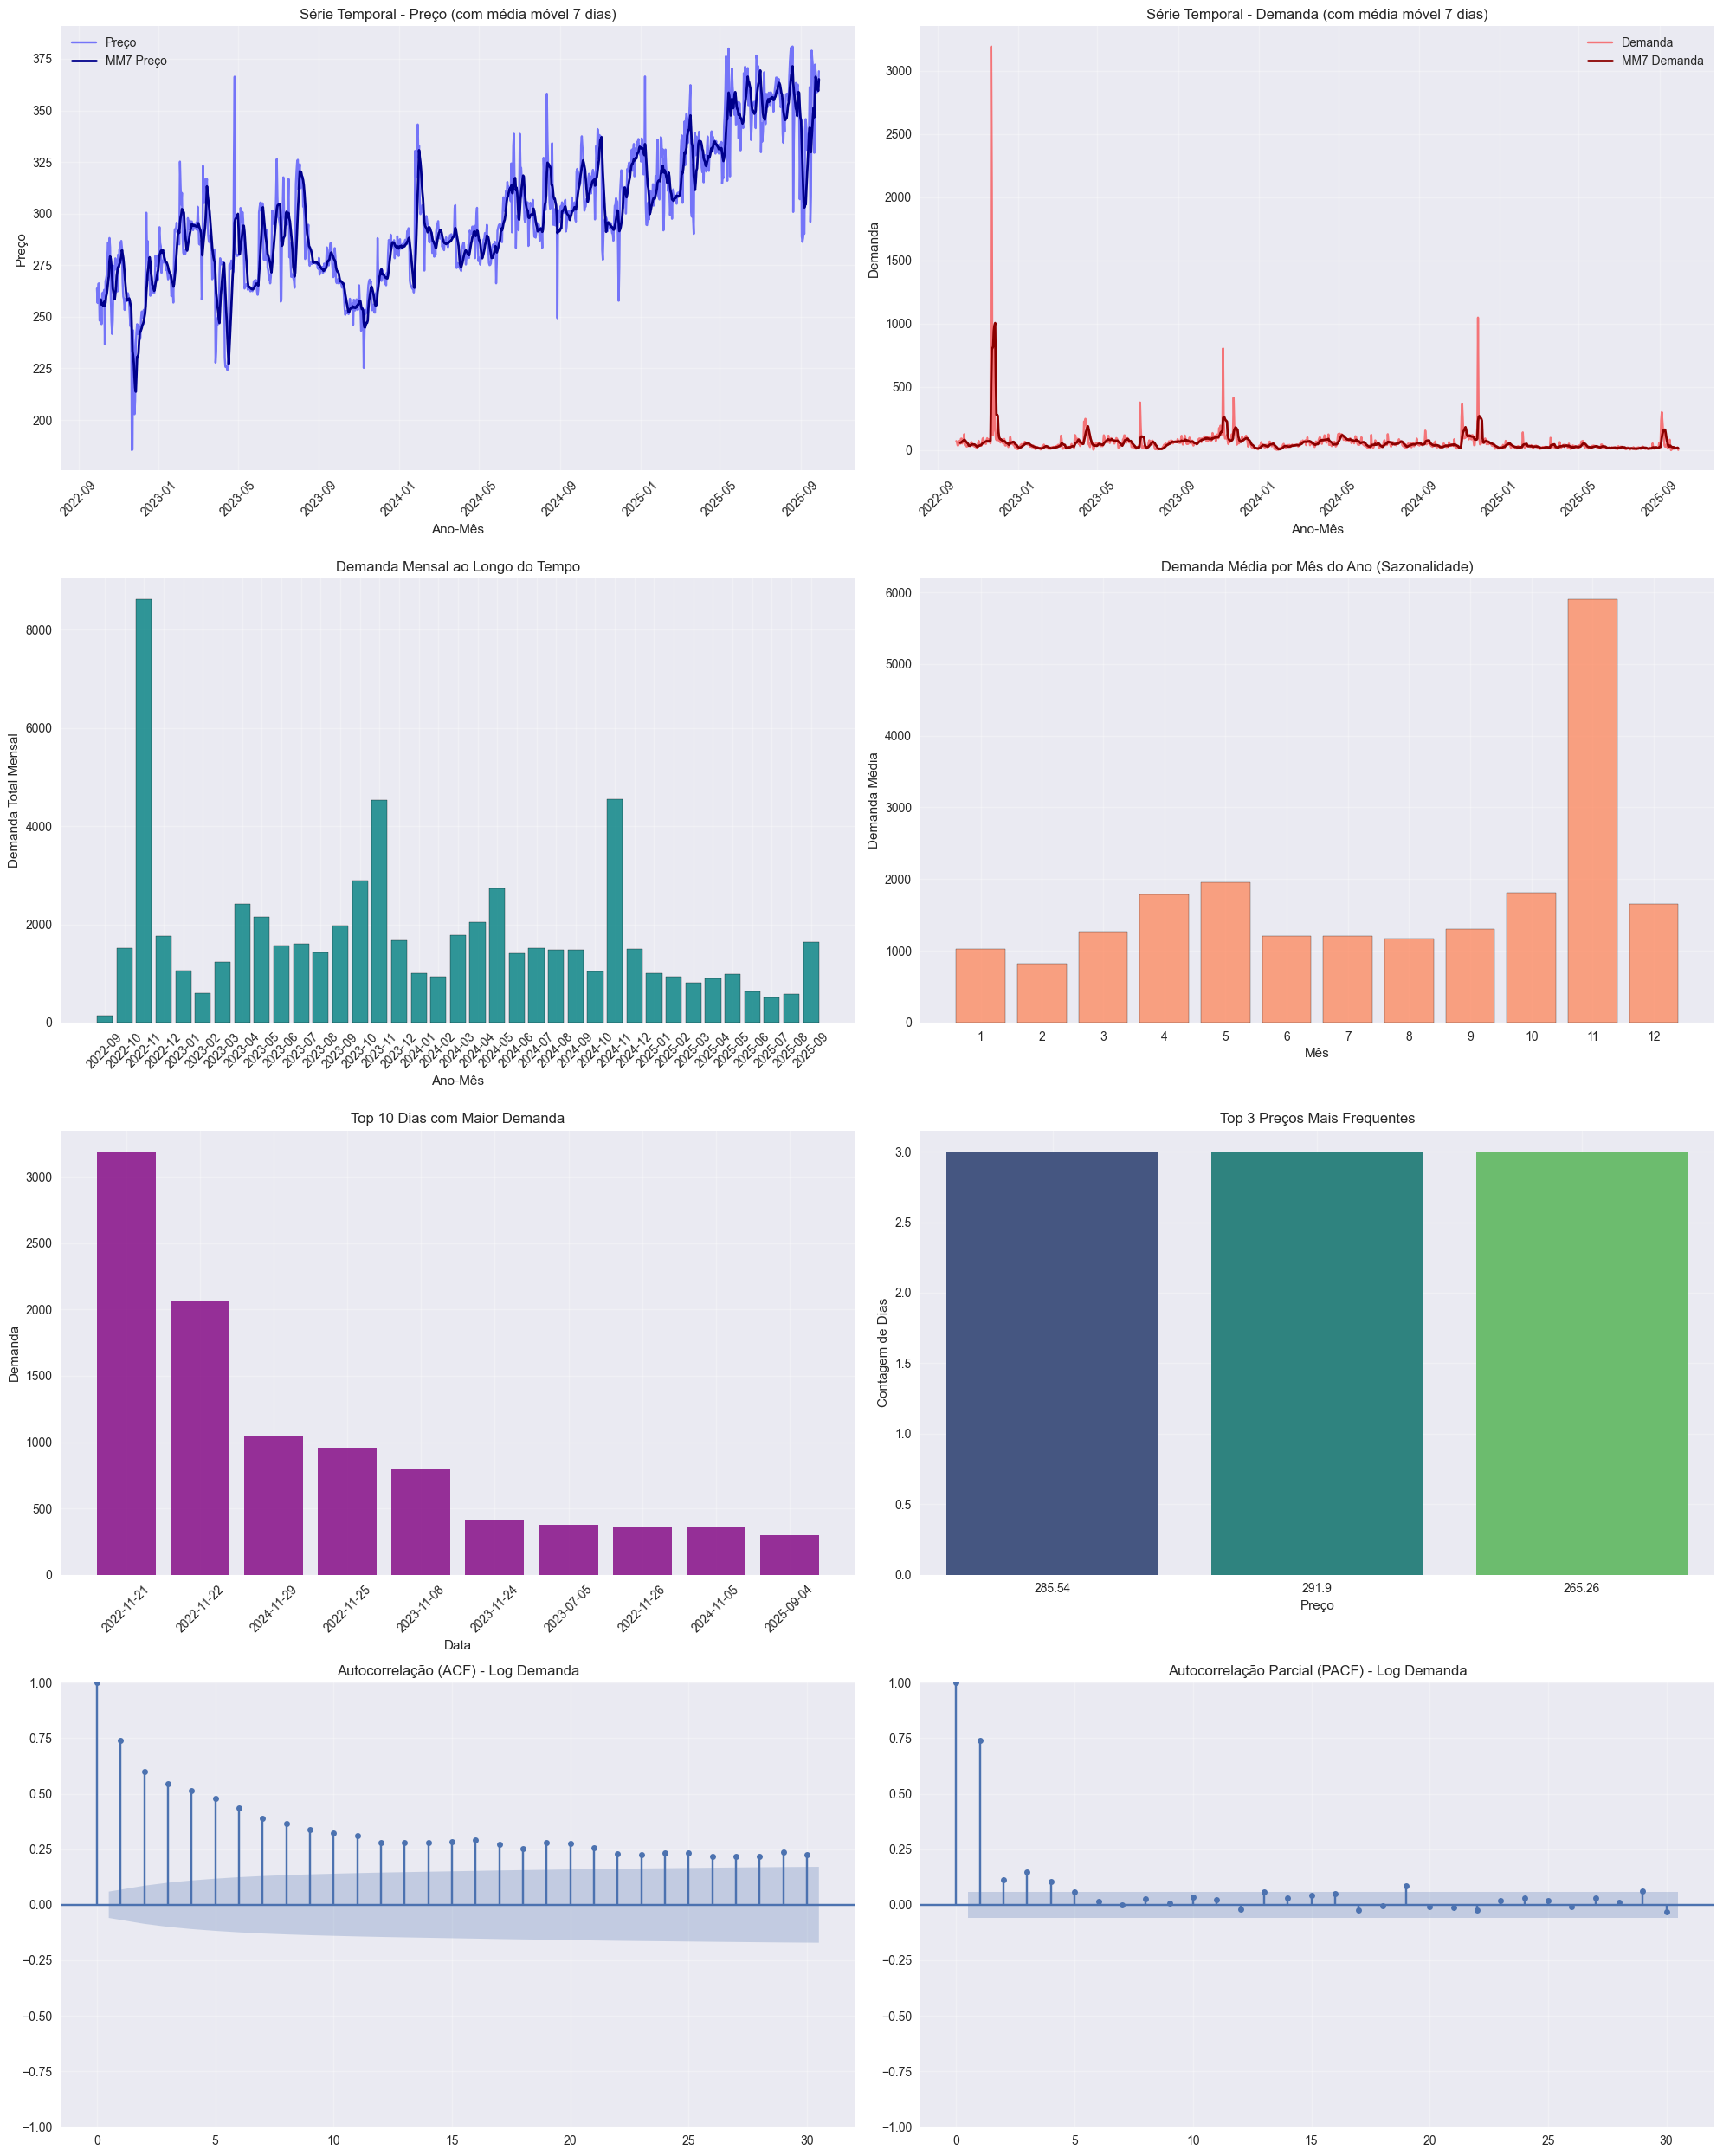

7. ANÁLISE DE SAZONALIDADE POR DIA DA SEMANA:
Demanda média por dia da semana:
  Segunda-feira: 70.38
  Terça-feira: 68.63
  Quarta-feira: 62.47
  Quinta-feira: 56.40
  Sexta-feira: 62.26
  Sábado: 46.12
  Domingo: 46.15

8. RESUMO E RECOMENDAÇÕES PARA MODELAGEM:
TODAS as variáveis são estacionárias - OK para modelagem

 Correlação Log_Preco x Log_Demanda: -0.6957
   → Correlação forte - bom preditor

 RECOMENDAÇÕES FINAIS PARA VALIDAÇÃO CRUZADA:
1. Variáveis já estacionárias - pode prosseguir diretamente
4. Use TimeSeriesSplit do sklearn para validação cruzada temporal
5. Monitore overfitting comparando performance treino/teste
6. Considere modelos SARIMA para capturar sazonalidade

 Análise concluída - Dados prontos para modelagem!


(     AnoMes       Preco  Demanda  Log_Preco  Log_Demanda
 0   2022-09  260.200000    134.0   5.561359     4.201900
 1   2022-10  265.185161   1517.0   5.579159     3.775728
 2   2022-11  250.664000   8615.0   5.518190     4.650235
 3   2022-12  263.371613   1767.0   5.572131     3.920139
 4   2023-01  277.904194   1061.0   5.626527     3.411263
 5   2023-02  293.394643    591.0   5.680941     2.949246
 6   2023-03  283.633548   1231.0   5.644110     3.463641
 7   2023-04  267.952000   2422.0   5.584716     4.070361
 8   2023-05  272.689677   2154.0   5.607218     4.179816
 9   2023-06  289.950333   1572.0   5.668228     3.767679
 10  2023-07  291.666129   1599.0   5.673398     3.480653
 11  2023-08  289.580968   1422.0   5.666726     3.592199
 12  2023-09  275.104667   1975.0   5.616945     4.147224
 13  2023-10  257.608065   2889.0   5.551188     4.519359
 14  2023-11  257.092000   4539.0   5.548512     4.801911
 15  2023-12  277.811613   1675.0   5.626540     3.706341
 16  2024-01  

In [5]:
from Functions.FNC_aval_estat import avaliar_dados_series_temporais

avaliar_dados_series_temporais(Venda,'7172')

### Modelo: Validação Cruzada de Séries Temporais

In [6]:
from Functions.FNC_TSCV import modelo_validacao_cruzada_series_temporais, converter_para_escala_original,encontrar_melhor_alpha


resultados_modelo_principal = modelo_validacao_cruzada_series_temporais(
    Venda, '7172', 
    'Log_Preco',                                                                   #Variáveis independentes
    'Quarta-feira', 'Terça-feira'
    ,var_dpd = 'Log_Demanda'                                                       #Variáveis dependentes
    ,n_splits=10
)

# Converter para a escala original
metricas_originais = converter_para_escala_original(resultados_modelo_principal, Venda)

# Encontre o melhor alpha, mas armazene em variáveis diferentes para não sobrescrever
X_cols = ['Log_Preco','Black_Friday','promocionado_25', 'Quarta-feira','Terça-feira']
y_col = 'Log_Demanda'
melhor_alpha, resultados_alpha = encontrar_melhor_alpha(Venda, X_cols, y_col)

=== MODELO DE VALIDAÇÃO CRUZADA - SKU 7172 ===

Verificando qualidade dos dados...
 Executando validação cruzada temporal...
 Fold 1:
   Período teste: 2023-01-14 a 2023-04-22
   RMSE: 0.6172, WAPE: 14.47%
 Fold 2:
   Período teste: 2023-04-23 a 2023-07-30
   RMSE: 0.5658, WAPE: 11.83%
 Fold 3:
   Período teste: 2023-07-31 a 2023-11-06
   RMSE: 0.5102, WAPE: 10.71%
 Fold 4:
   Período teste: 2023-11-07 a 2024-02-13
   RMSE: 0.6253, WAPE: 13.18%
 Fold 5:
   Período teste: 2024-02-14 a 2024-05-22
   RMSE: 0.6122, WAPE: 12.87%
 Fold 6:
   Período teste: 2024-05-23 a 2024-08-29
   RMSE: 0.5616, WAPE: 13.24%
 Fold 7:
   Período teste: 2024-08-30 a 2024-12-06
   RMSE: 0.8004, WAPE: 15.80%
 Fold 8:
   Período teste: 2024-12-07 a 2025-03-15
   RMSE: 0.4465, WAPE: 10.30%
 Fold 9:
   Período teste: 2025-03-16 a 2025-06-22
   RMSE: 0.4640, WAPE: 11.42%
 Fold 10:
   Período teste: 2025-06-23 a 2025-09-29
   RMSE: 0.8979, WAPE: 14.63%

 RESULTADOS FINAIS DO MODELO
 Métricas Médias nos 10 folds:
   

### Modelo: SARIMAX 

In [7]:
from Functions.FNC_SARIMAX import modelo_sarimax

# Variáveis exógenas
exog_vars_sarimax = [
    'Log_Preco'
]

resultado_sarimax = modelo_sarimax(
    Venda, 
    '7172', 
    *exog_vars_sarimax,
    endog_var='Log_Demanda',
    order=(1, 1, 1), 
    seasonal_order=(1, 1, 1, 7)
)

--- Análise de Estacionariedade para: Demanda ---
Estatística ADF: -10.124953237294886
p-valor: 9.233793897662869e-18
Valores Críticos:
	1%: -3.4363635475753824
	5%: -2.864195245967465
	10%: -2.5681837404258903
Resultado: A série 'Demanda' é ESTACIONÁRIA (p-valor <= 0.05). Rejeita-se a hipótese nula.
--------------------------------------------------
--- Análise de Estacionariedade para: Log_Demanda ---
Estatística ADF: -6.660752467489623
p-valor: 4.854134152307967e-09
Valores Críticos:
	1%: -3.436352507699052
	5%: -2.86419037625175
	10%: -2.56818114683546
Resultado: A série 'Log_Demanda' é ESTACIONÁRIA (p-valor <= 0.05). Rejeita-se a hipótese nula.
--------------------------------------------------

--- Treinando Modelo SARIMAX para SKU: 7172 ---
Variável Dependente: Log_Demanda
Variáveis Independentes: ['Log_Preco']
Ordem (p,d,q): (1, 1, 1)
Ordem Sazonal (P,D,Q,s): (1, 1, 1, 7)

--- Sumário do Modelo SARIMAX ---
                                     SARIMAX Results                    

### Consolidação e Comparação de Previsões

In [8]:
from Functions.FNC_Previsoes import gerar_previsoes_e_relatorios

# Definir o caminho para a planilha de preços
caminho_previsao = 'C:/Users/joao.pcarvalho/Desktop/Git Repositórios/Forecast-vendas-e-elasticidade/Forecast/Precos_para_previsoes.xlsx'

# Definir as colunas de features usadas no modelo TSCV
X_cols_tscv = ['Log_Preco', 'Quarta-feira', 'Terça-feira']

# Gerar as previsões e o relatório de comparação
df_previsoes, df_relatorio = gerar_previsoes_e_relatorios(
    resultados_modelo_principal,
    resultado_sarimax,
    '7172',
    caminho_previsao,
    X_cols_tscv=X_cols_tscv
)


--- INICIANDO GERAÇÃO DE PREVISÕES E RELATÓRIOS ---

Calculando previsões para o modelo de Validação Cruzada (TSCV)...
Calculando previsões para o modelo SARIMAX...

Arquivo de previsões salvo em: ../Resultados/previsoes_consolidadas_7172.csv

Gerando relatório de comparação de modelos...
Arquivo de relatório de modelos salvo em: ../Resultados/relatorio_comparacao_modelos_7172.csv

--- Processo Concluído ---

Calculando previsões para o modelo de Validação Cruzada (TSCV)...
Calculando previsões para o modelo SARIMAX...

Arquivo de previsões salvo em: ../Resultados/previsoes_consolidadas_7172.csv

Gerando relatório de comparação de modelos...
Arquivo de relatório de modelos salvo em: ../Resultados/relatorio_comparacao_modelos_7172.csv

--- Processo Concluído ---


In [9]:
print("DataFrame com as Previsões Consolidadas:")
df_previsoes.head(20)

DataFrame com as Previsões Consolidadas:


,Data,SKU,Preco,previsao_SARIMAX,previsao_TSCV
0,2025-09-18,7172,379,4.225980,8.486701
1,2025-09-19,7172,375,6.637818,8.982769
2,2025-09-20,7172,370,6.479988,9.652108
3,2025-09-21,7172,369,7.476016,9.792986
4,2025-09-22,7172,329,18.424615,18.101402
5,2025-09-23,7172,372,7.178298,11.002123
6,2025-09-24,7172,369,9.302688,11.283827
7,2025-09-25,7172,366,9.959757,10.230502
8,2025-09-26,7172,358,12.234568,11.515581
9,2025-09-27,7172,360,9.001844,11.177167


In [10]:
print("DataFrame com o Relatório de Comparação dos Modelos:")
df_relatorio.head()

DataFrame com o Relatório de Comparação dos Modelos:


,sku,data_rodagem,coef_log_preco_tscv,coef_log_preco_sarimax,intercepto_tscv,AIC_sarimax,BIC_sarimax,AIC_cruzado,BIC_cruzado
0,7172,2025-09-29 09:49:20,-5.354095,-8.532288,33.928633,1110.380934,1140.289232,817.012236,833.52721


### Visualização da Performance das Previsões

--- GERANDO GRÁFICOS DE COMPARAÇÃO DE PREVISÕES PARA SKU 7172 ---


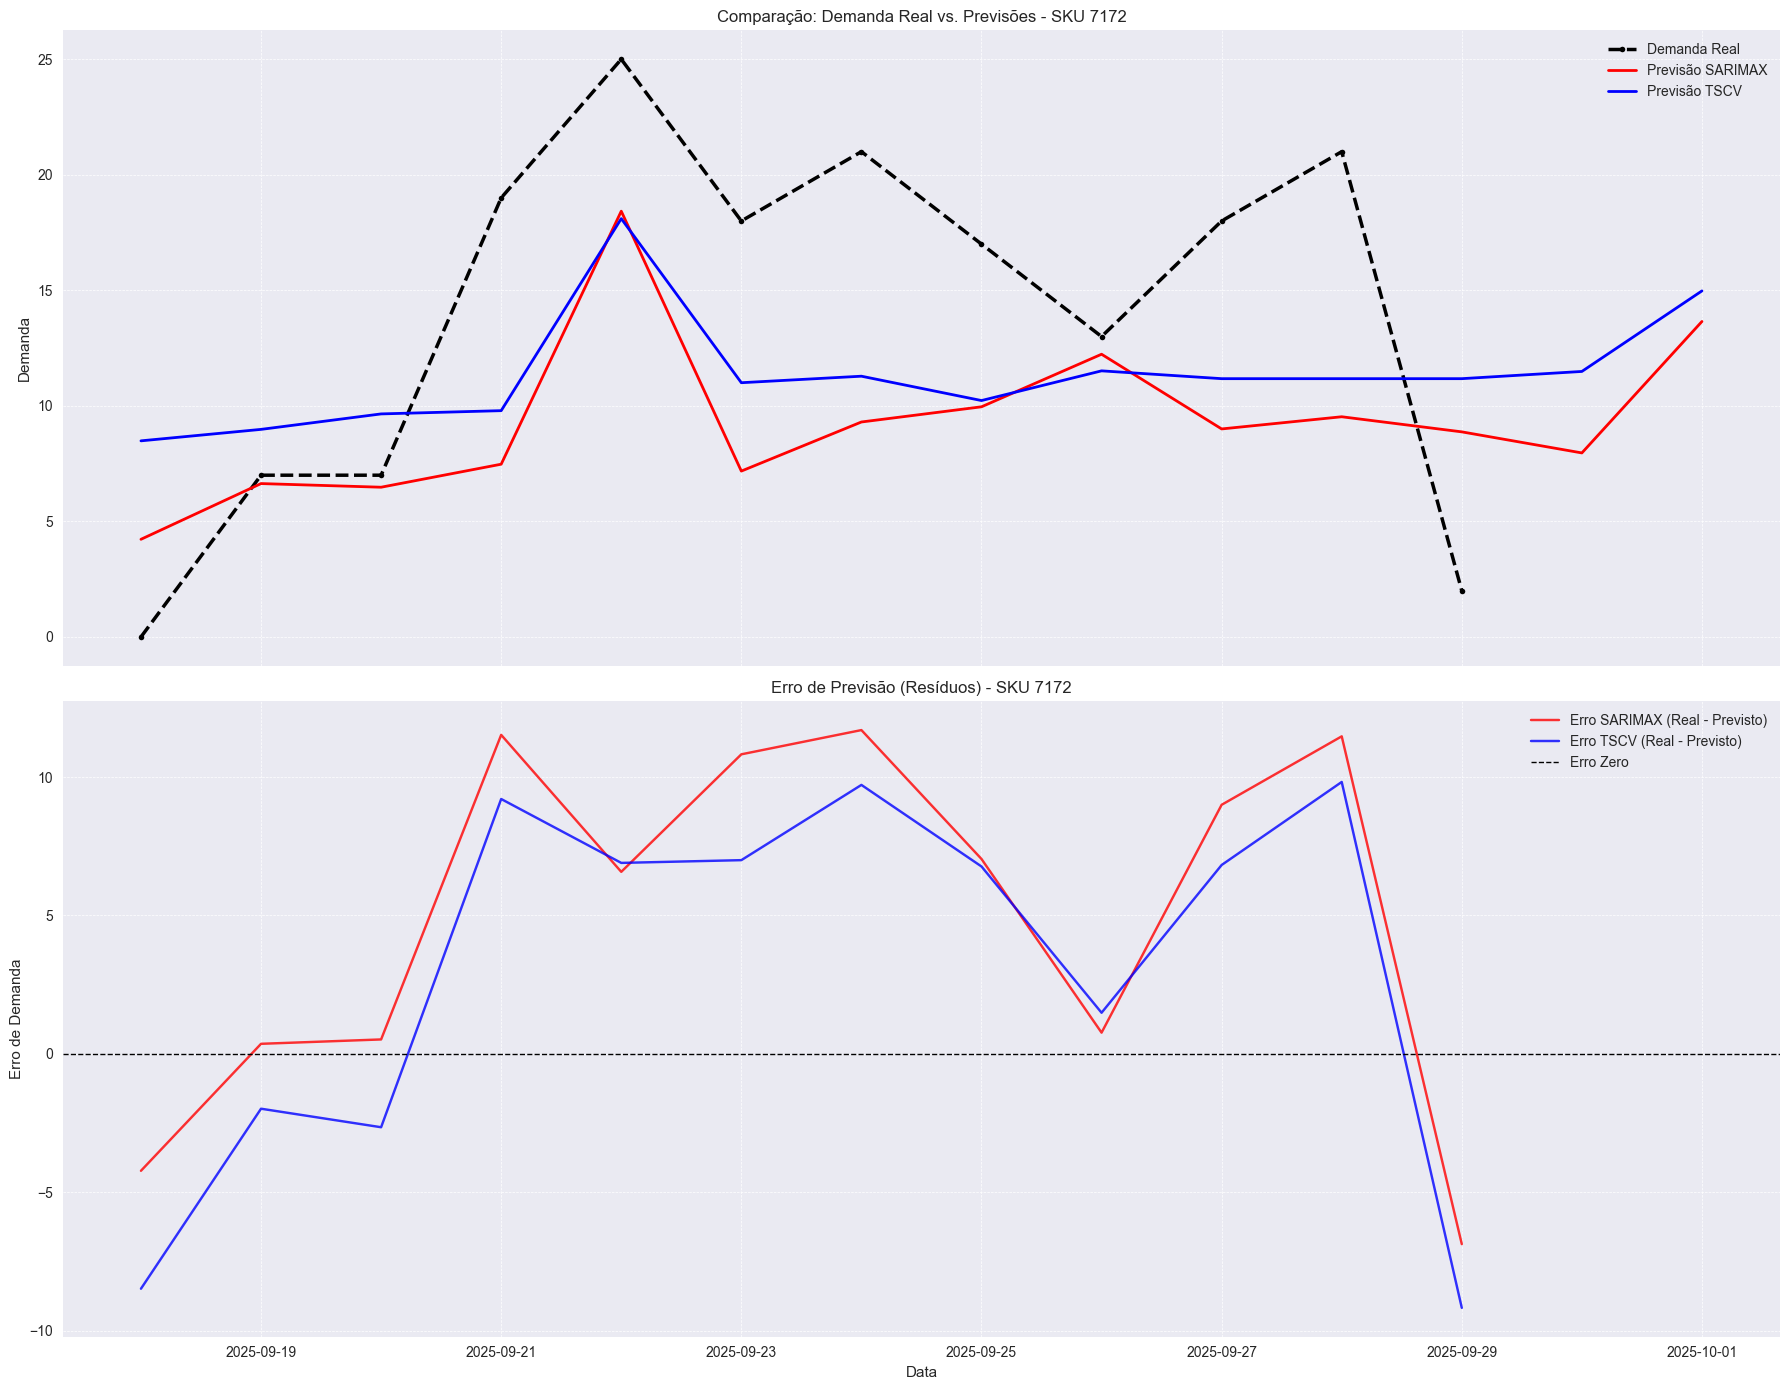

In [11]:
from Functions.FNC_aval_estat import plotar_comparacao_previsoes


plotar_comparacao_previsoes(df_previsoes, Venda, '7172')

### Previsão Futura (Próximos 30 Dias)

--- INICIANDO PREVISÃO PARA OS PRÓXIMOS 30 DIAS (SKU: 7172) ---
Último preço registrado: 369.00 em 2025-09-29
Para os próximos 30 dias, o preço será baseado no mesmo dia 30 dias atrás, ou no último preço se a data não existir.

Gráfico de previsão salvo em: ../Graficos/previsao_30_dias_sku_7172.png

Gráfico de previsão salvo em: ../Graficos/previsao_30_dias_sku_7172.png


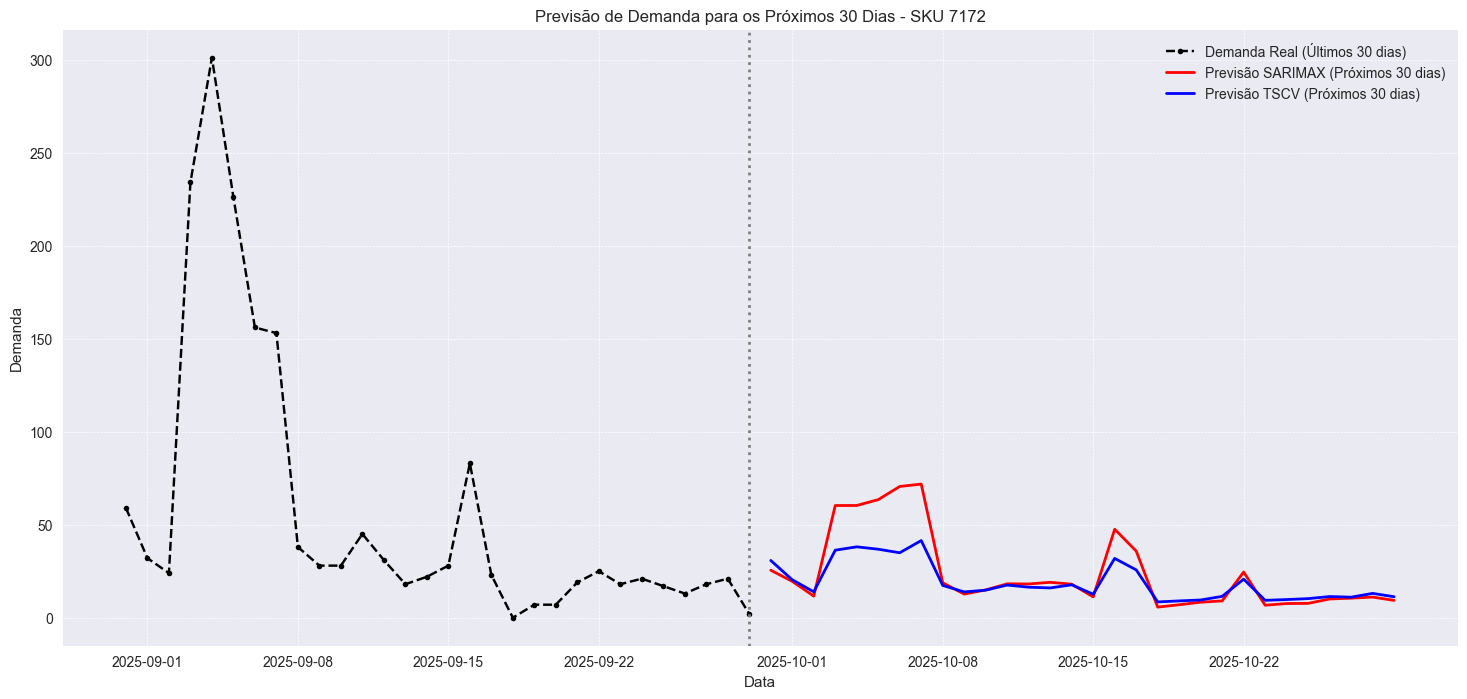

In [12]:
from Functions.FNC_Previsoes import pred_prox_30_dias

# Gerar o gráfico e o DataFrame com a previsão para os próximos 30 dias
df_previsao_futura = pred_prox_30_dias(
    resultados_modelo_principal,
    resultado_sarimax,
    Venda,
    '7172',
    X_cols_tscv=X_cols_tscv
)

In [13]:
print("DataFrame com a previsão para os próximos 30 dias:")
df_previsao_futura.head(31)

DataFrame com a previsão para os próximos 30 dias:


,Data,SKU,Preco,Log_Preco,Quarta-feira,Terça-feira,previsao_TSCV,previsao_SARIMAX
0,2025-09-30,7172,306.96,5.726717,0,1,30.784736,25.534173
1,2025-10-01,7172,330.42,5.800365,1,0,20.381635,19.543489
2,2025-10-02,7172,345.51,5.845022,0,0,13.927041,11.623418
3,2025-10-03,7172,288.91,5.666115,0,0,36.296235,60.303639
4,2025-10-04,7172,286.30,5.657040,0,0,38.103361,60.329745
5,2025-10-05,7172,288.14,5.663446,0,0,36.818585,63.472899
6,2025-10-06,7172,291.01,5.673358,0,0,34.915731,70.541522
7,2025-10-07,7172,290.34,5.671053,0,1,41.473455,71.841752
8,2025-10-08,7172,340.45,5.830268,1,0,17.366221,18.786498
9,2025-10-09,7172,345.79,5.845832,0,0,13.866768,12.692928
